# **Introduction**

---

## **TA Instructor**
Name: Anastasia Andronova

Telegram: @andronova_anastasia

Mail: a.andronova@innopolis.university



#**Four Fundamental Subspaces**
---
>From the lectures we know that there are four fundamental subspaces accompanying any linear operator (matrix) $\mathbf{A}^{m \times n}$, namely:
>*   **Column** space (range, image): $\mathcal{C}(\mathbf{A}) \in \mathbb{R}^m$
>*   **Null** space (kernel): $\mathcal{N}(\mathbf{A}) \in \mathbb{R}^n$
>*   **Row** space: $\mathcal{R}(\mathbf{A}) = \mathcal{C}(\mathbf{A}^T)  \in \mathbb{R}^n$
>*   **Left null** space: $\mathcal{N}(\mathbf{A}^T) \in \mathbb{R}^m$
---
>**QUESTION**:
What is rank of a matrix?

---
Dimensions of the subspaces.
For $\mathbf{A}^{m \times n}$ of rank $r$:
*  The dimension of the column space $\mathcal{C}(\mathbf{A})$ is $r$.
*  The dimension of the row space $\mathcal{R}(\mathbf{A})$ is $r$.
*  The dimension of the null space $\mathcal{N}(\mathbf{A})$ is $n-r$.
*  The dimension of the left null space $\mathcal{N}(\mathbf{A}^T)$ is $m-r$.

## **Example**
Find a basis for each of the four subspaces associated with $A$
\begin{equation}
\boldsymbol{A}=
\begin{bmatrix}
1 & 2 & 4\\
2 & 4 & 8
\end{bmatrix}  
\end{equation}

In [ ]:
from sympy import Matrix, pprint

A = [[1, 2, 4], [2, 4, 8]]
A_m = Matrix(A)
print('Basis of null space:')
pprint(A_m.nullspace())
print('Basis of column space:')
pprint(A_m.columnspace())
print('Basis of row space:')
pprint(A_m.T.columnspace())
print('Basis of left null space:')
pprint(A_m.T.nullspace())

Basis of null space:
⎡⎡-2⎤  ⎡-4⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥, ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣1 ⎦⎦
Basis of column space:
⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎣⎣2⎦⎦
Basis of row space:
⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎢⎢2⎥⎥
⎢⎢ ⎥⎥
⎣⎣4⎦⎦
Basis of left null space:
⎡⎡-2⎤⎤
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦


In [ ]:
import numpy as np
from scipy.linalg import null_space, orth

null_A = null_space(A)
print('Basis of null space:\n', null_A)

# print(A@null_A)
# print('Basis of column space:\n', np.around(orth(A),2))
# print('Basis of row space:\n', np.around(orth(np.transpose(A)),2))
# print('Basis of left null space:\n', np.around(null_space(np.transpose(A)),2))

Basis of null space:
 [[-9.75900073e-01 -2.02874033e-16]
 [ 9.75900073e-02 -8.94427191e-01]
 [ 1.95180015e-01  4.47213595e-01]]


## **Solving systems of equations**
For linear systems $Ax = b$ with non-unique solutions (such as under-determined systems), the pseudoinverse may be used to construct the solution with minimum norm among all solutions

In [ ]:
A_ODE = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b_ODE = np.array([[6],[15],[24]])

A_pinv = np.linalg.pinv(A_ODE)
x = A_pinv @ b_ODE
# print(x)
print(A_ODE @ x)

[[ 6.]
 [15.]
 [24.]]


But what if we need all solutions?

In [ ]:
z = np.array([[7], [10], [1]])
x_p = A_pinv @ b_ODE + (np.eye(3)- A_pinv @ A_ODE)@ z
# x_p = A_pinv @ b_ODE + null_space(A_ODE) @ z
print(x_p)
print(A_ODE @ x_p)

[[-1.]
 [ 5.]
 [-1.]]
[[ 6.]
 [15.]
 [24.]]


## **Exercises**
## Task 1
A vector equation for the plane is $n\cdot(r-r_0)=0$, where $n$ is a normal vector of the plane, $r$ is the position vector for any point $P$ on the plane and $r_0$ is the position vector for $P_0$.

The task is to find the equation of a plane passing through origin and including two vectors $v_1 = [1, -5, 1]$ and $v_2 = [2, -1, -5]$.

In [ ]:
v1 = np.array([[1, -5, 1]])
v2 = np.array([[2, -1, -5]])
# print(np.vstack([v1, v2]))
n = null_space(np.vstack([v1, v2]))
print(n)

[[0.91581094]
 [0.24656448]
 [0.31701148]]


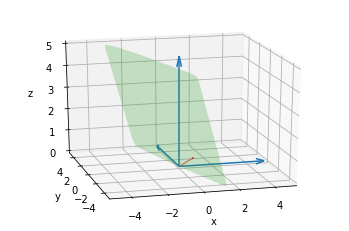

In [ ]:
import matplotlib.pyplot as plt

def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-105, elev=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(0, 5)
    return ax

ax = setup_3d_axes()

origin = np.zeros((3, 1))

basis = n

# compute the plane orthogonal to basis
x, y = np.meshgrid(np.linspace(-5, 5, 61), np.linspace(-5, 5, 61))
A, B, C = basis
z = (-A * x - B * y) / C

# cut off the plane below z=0 (just to make the plot nicer)
mask1 = np.where(z >= 0)
x = x[mask1]
y = y[mask1]
z = z[mask1]

mask2 = np.where(z <= 5)
x = x[mask2]
y = y[mask2]
z = z[mask2]

ax.plot_trisurf(x, y, z, color='C2', shade=False, alpha=0.25)
ax.quiver3D(*np.concatenate([origin, basis]).flatten(),
            arrow_length_ratio=0.1, color='r', alpha=0.5)

x_a, y_a, z_a = np.zeros((3,3))
u, v, w = np.array([[5, 0, 0], [0, 5, 0], [0, 0, 5]])

ax.quiver(x_a, y_a, z_a, u, v, w, arrow_length_ratio=0.1)
# ax.quiver3D(*np.concatenate([origin, v1.reshape(3, 1)]).flatten(),
#             arrow_length_ratio=0.1, color='b', alpha=0.5)
# ax.quiver3D(*np.concatenate([origin, v2.reshape(3, 1)]).flatten(),
#             arrow_length_ratio=0.1, color='b', alpha=0.5)
plt.show()

## Task 2
Let $S$ be the sphere
\begin{equation}
x^2+y^2+z^2=14.
\end{equation}
Find the tangent plane to $S$ at the point $P (1,2,3)$.

In [ ]:
def sphere_frame(centre=[0.,0.,0.], radius = 1, n_meridians = 20, n_circles_latitude = None):
    if n_circles_latitude is None:
        n_circles_latitude = max(n_meridians/2, 4)

    u, v = np.mgrid[0:2*np.pi:n_meridians*1j, 0:np.pi:n_circles_latitude*1j]

    sphere_x = centre[0] + radius * np.cos(u) * np.sin(v)
    sphere_y = centre[1] + radius * np.sin(u) * np.sin(v)
    sphere_z = centre[2] + radius * np.cos(v)

    return sphere_x, sphere_y, sphere_z

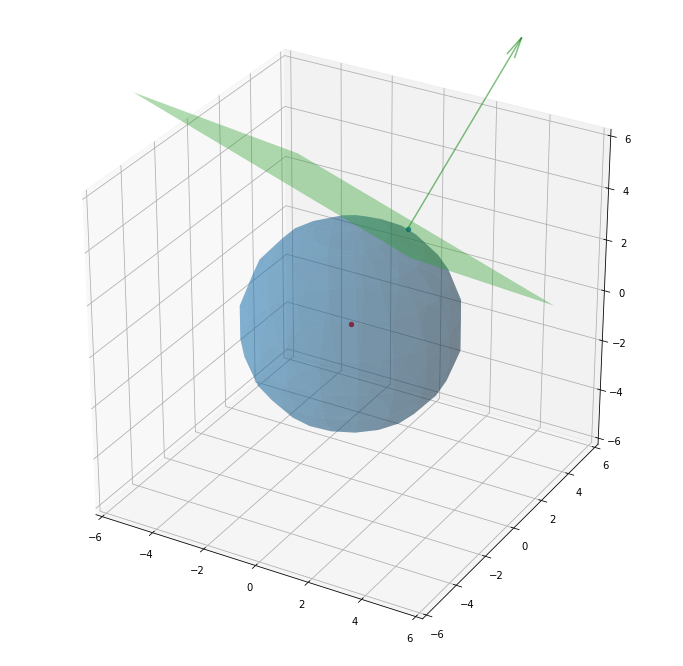

In [ ]:
o_x, o_y, o_z = sphere_frame([0.,0.,0.], np.sqrt(14))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Plot the sphere S
ax.plot_surface(o_x, o_y, o_z, alpha=0.33)
# Plot the point P and the origin
ax.scatter(1,2,3)
ax.scatter(0,0,0, c='r')

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)

origin = np.zeros((3, 1))

point  = np.array([1, 2, 3])
normal = np.array([2, 4, 6])

ax.quiver3D(*np.concatenate([point, normal]).flatten(),
            arrow_length_ratio=0.1, color='g', alpha=0.5)

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(np.linspace(-5, 5, 61), np.linspace(-5, 5, 61))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
ax.plot_surface(xx, yy, z, color='C2', shade=False, alpha=0.4)
plt.show()



## **Projection**
>**QUESTION**: What is a projection?

To give a simple geometric example, imagine the point $(3,2,5)$ in 3-dimensional space. A projection of that point onto the $x,y$ plane looks a lot like a shadow cast by that point if the sun were directly above it:

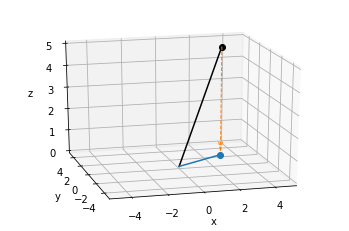

In [ ]:
ax = setup_3d_axes()

# plot the vector (3, 2, 5)
origin = np.zeros((3, 1))
point = np.array([[3, 2, 5]]).T
vector = np.hstack([origin, point])
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')

# project the vector onto the x,y plane and plot it
xy_projection_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
projected_point = xy_projection_matrix @ point
projected_vector = xy_projection_matrix @ vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1, color='C1',
            linewidth=1, linestyle='dashed')

We used matrix multiplication to compute the projection of our point $(3,2,5)$ plane
\begin{equation}
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}  
\begin{bmatrix}
3\\
2\\
5
\end{bmatrix} =
\begin{bmatrix}
3\\
2\\
0
\end{bmatrix}.
\end{equation}
Try to apply the projection again to the result.

## Example: projection as noise reduction

Suppose that in order to take that measurement you had to pull a trigger on a measurement device, and the act of pulling the trigger causes the device to move a little. If you measure how trigger-pulling affects measurement device position, you could then “correct” your real measurements to “project out” the effect of the trigger pulling. Here we’ll suppose that the average effect of the trigger is to move the measurement device by $(3,-1,1)$:

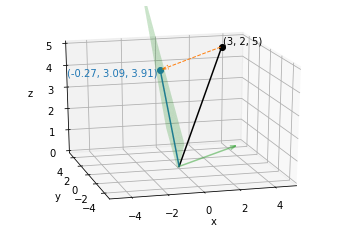

In [ ]:
from scipy.linalg import svd

trigger_effect = np.array([[3, -1, 1]]).T

# compute the plane orthogonal to trigger_effect
x, y = np.meshgrid(np.linspace(-1, 5, 61), np.linspace(-1, 5, 61))
A, B, C = trigger_effect
z = (-A * x - B * y) / C
# cut off the plane below z=0 (just to make the plot nicer)
mask = np.where(z >= 0)
x = x[mask]
y = y[mask]
z = z[mask]

# compute the projection matrix
U, S, V = svd(trigger_effect, full_matrices=False)
trigger_projection_matrix = np.eye(3) - U @ U.T

# project the vector onto the orthogonal plane
projected_point = trigger_projection_matrix @ point
projected_vector = trigger_projection_matrix @ vector

# plot the trigger effect and its orthogonal plane
ax = setup_3d_axes()
ax.plot_trisurf(x, y, z, color='C2', shade=False, alpha=0.25)
ax.quiver3D(*np.concatenate([origin, trigger_effect]).flatten(),
            arrow_length_ratio=0.1, color='C2', alpha=0.5)

# plot the original vector
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')
offset = np.full((3, 1), 0.1)
ax.text(*(point + offset).flat, '({}, {}, {})'.format(*point.flat), color='k')

# plot the projected vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')
offset = np.full((3, 1), -0.2)
ax.text(*(projected_point + offset).flat,
        '({}, {}, {})'.format(*np.round(projected_point.flat, 2)),
        color='C0', horizontalalignment='right')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1,
            color='C1', linewidth=1, linestyle='dashed')
plt.show()